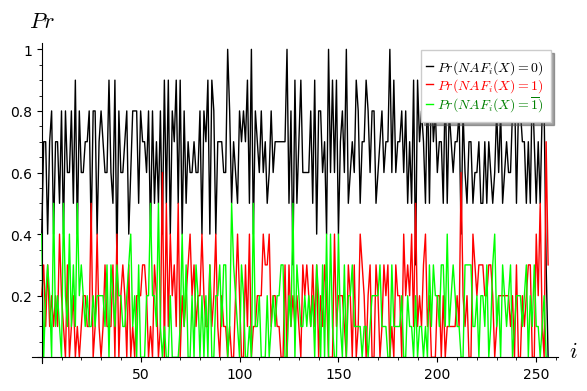

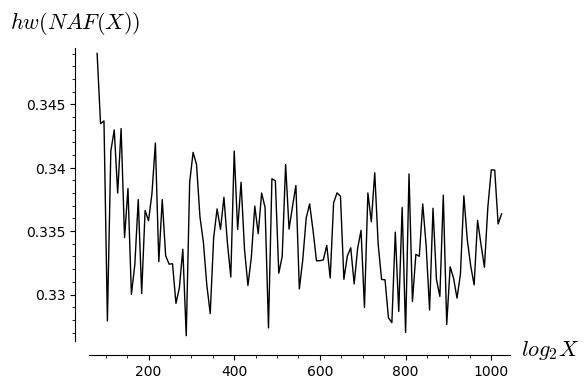

In [8]:
def NAF_encode(number):
    """
    Returns NAF representation
    of given integer 'number'
    """
    naf = []
    while number > 0:
        if number & 1:
            temp = 2 - (number & 3)
        else:
            temp = 0
        number = (number - temp) >> 1
        naf.append(temp)
    return naf

def measure_hamming_weight_naf(bitlen, num_tries=100000):
    num_elements = 0
    num_non_zeroes = 0
    for a in range(0, num_tries):
        x = 0
        while x < 2^(bitlen-1):
            x = ZZ.random_element(2^bitlen)
            
        naf = NAF_encode(x)
        
        non_zeroes = 0
        
        for index in range(len(naf)):
            element = naf[index]
            if element != 0:
                non_zeroes = non_zeroes + 1
                
        num_elements = num_elements + len(naf)
        
        num_non_zeroes = num_non_zeroes + non_zeroes
    
    percentage_non_zeroes = num_non_zeroes / num_elements
    
    return percentage_non_zeroes

def measure_naf_distribution_per_digit(bitlen, num_tries=100000):
    max_naf_len = bitlen + 1
    zeroes = [0] * max_naf_len
    ones = [0] * max_naf_len
    neg_ones = [0] * max_naf_len
    
    for a in range(num_tries):
        x = 0
        while x < 2^(bitlen-1):
            x = ZZ.random_element(2^bitlen)
            
        naf = NAF_encode(x)
        
        for index in range(len(naf)):
            element = naf[index]
            if element == 0:
                zeroes[index] = zeroes[index] + 1
            elif element == 1:
                ones[index] = ones[index] + 1
            elif element == -1:
                neg_ones[index] = neg_ones[index] + 1
                
    points_zeroes = []
    points_ones = []
    points_neg_ones = []
    
    for index in range(len(zeroes)):
        points_zeroes.append((index, zeroes[index] / num_tries))
        points_ones.append((index, ones[index] / num_tries))
        points_neg_ones.append((index, neg_ones[index] / num_tries))

    return (points_zeroes, points_ones, points_neg_ones)

p = measure_naf_distribution_per_digit(256, num_tries=1000000)

p1 = line(p[0], legend_label="$Pr(NAF_i(X)=0)$", legend_color="black", rgbcolor=(0,0,0), axes_labels=['$i$','$Pr$'])
p2 = line(p[1], legend_label="$Pr(NAF_i(X)=1)$", legend_color="red", rgbcolor=(1,0,0))
p3 = line(p[2], legend_label="$Pr(NAF_i(X)=\overline{1})$", legend_color="green", rgbcolor=(0,1,0))

p = p1 + p2 + p3

show(p)

graph_non_zeroes = []

for length in range(80, 1025, 8):
    measured = measure_hamming_weight_naf(length, 100000)
    
    graph_non_zeroes.append((length, measured))

q = line(graph_non_zeroes, legend_color="black", rgbcolor=(0,0,0), axes_labels=['$log_2 X$','$hw(NAF(X))$'])
show(q)